In [1]:
from pathlib import Path
import os
from dotenv import load_dotenv
import json
import psycopg2
from psycopg2.extras import RealDictCursor

load_dotenv()

DB_PATH = Path().resolve()/ 'hospital_staff.db'

machine = os.getenv("MACHINE")
db_user = os.getenv("DB_USER")
db_pw = os.getenv("DB_PASSWORD")
db_name = os.getenv("DB_NAME")
db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")

In [2]:

aws_access_key = os.getenv("AWS_ACCESS_KEY")
aws_secret_key = os.getenv("AWS_SECRECT_ACCESS")
aws_region = os.getenv("AWS_REGION")
bucket_name = os.getenv("S3_BUCKET_NAME")

s3 = boto3.client(
    "s3",
    aws_access_key_id=aws_access_key,
    aws_secret_access_key=aws_secret_key,
    region_name=aws_region
)

In [3]:
import boto3

In [25]:
!pip show boto3

Name: boto3
Version: 1.40.24
Summary: The AWS SDK for Python
Home-page: https://github.com/boto/boto3
Author: Amazon Web Services
Author-email: 
License: Apache License 2.0
Location: c:\users\sasikumar\onedrive\data_science\envs\hosp_310v1\lib\site-packages
Requires: botocore, jmespath, s3transfer
Required-by: 


In [23]:
import matplotlib.pyplot as plt

Bytes length: 84550


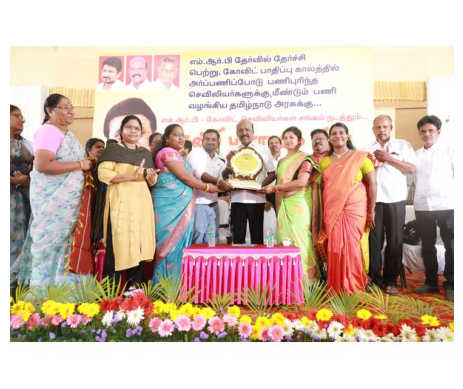

In [24]:
bucket_name = "mrb-association-files"
file_key = "data/optimized_association_photos/photo1.JPG"  # must match exactly

response = s3.get_object(Bucket=bucket_name, Key=file_key)
image_data = response["Body"].read()

print("Bytes length:", len(image_data))  # should be > 0

# Open image
image = Image.open(io.BytesIO(image_data))

# Display
plt.imshow(image)
plt.axis("off")
plt.show()

In [19]:
response = s3.list_objects_v2(Bucket="mrb-association-files", Prefix="data/optimized_association_photos/")
for obj in response.get("Contents", []):
    print(obj["Key"], obj["Size"])

data/optimized_association_photos/photo1.JPG 84550
data/optimized_association_photos/photo10.JPG 83008
data/optimized_association_photos/photo2.JPG 94282
data/optimized_association_photos/photo3.JPG 57818
data/optimized_association_photos/photo4.JPG 82974
data/optimized_association_photos/photo5.JPG 80238
data/optimized_association_photos/photo6.JPG 56886
data/optimized_association_photos/photo7.JPG 82102
data/optimized_association_photos/photo8.jpg 90154
data/optimized_association_photos/photo9.JPG 79582


In [16]:
image_data

b''

In [15]:
image_data = response["Body"].read()

# Open image with Pillow
image = Image.open(io.BytesIO(image_data))

# Display using matplotlib
plt.imshow(image)
plt.axis("off")
plt.show()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000182AF7045E0>

In [9]:
import io
from PIL import Image

In [13]:
response = s3.get_object(Bucket=bucket_name, Key=file_key)
image_data = response["Body"].read()

# Debug: print first few bytes
print(image_data[:50])

# Save to disk to inspect
with open("debug_output.bin", "wb") as f:
    f.write(image_data)

NameError: name 'file_key' is not defined

In [ ]:
response = s3.list_objects_v2(Bucket=bucket_name)
if "Contents" in response:
    for obj in response["Contents"]:
        print(" -", obj["Key"])
else:
    print("Bucket is empty")

In [ ]:
conn = psycopg2.connect(
    dbname = db_name,
    user = db_user,
    password = db_pw,
    host = db_host,
    port = db_port,
    cursor_factory=RealDictCursor
)

In [ ]:
#conn = get_connection()

c = conn.cursor()

c.execute('SELECT * FROM association_info WHERE id = 1')
row = c.fetchall()

In [ ]:
row

In [ ]:
row[0]['association_name']

In [ ]:
row

In [ ]:
c.description[0][0]

In [ ]:
columns = [col[0] for col in cursor.description]
result = [dict(zip(columns, row)) for row in rows]

In [ ]:
import sqlite3

In [ ]:
DB_PATH = Path().resolve()/'hospital_staff.db'

In [ ]:

conn = sqlite3.connect(DB_PATH)
conn.row_factory = sqlite3.Row

In [ ]:
c = conn.cursor()

c.execute('SELECT * FROM association_info WHERE id = 1')
rows = c.fetchall()

In [ ]:
isinstance(row, list)

In [ ]:
res = [dict(row) for row in rows]

In [ ]:
res[0]['id']